# Intro to Data Science - Project

## Olympic Games Analysis

### Libraries that will be used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans

sns.set_palette("twilight")
warnings.filterwarnings("ignore")

### Importing data

In [2]:
PATH = "./data/athlete_events.csv" 

# The dataset can be founded in: 
# https://github.com/caiochacon/projeto_final_ICD/blob/main/datasets/new_olympic/archive.zip?raw=true

df = pd.read_csv(PATH)  
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Activity 1

### Measures of centrality and dispersion of height, weight and age of athletes

In [3]:
#chosing the columns to be used
physiological_cols = ["Age", "Height", "Weight"]

df[physiological_cols].describe().iloc[1:,]

,Age,Height,Weight
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


### Boxplot of height, weight and age

In [4]:
def customBoxplot(col):
    """
        Function to create a boxplot more quickly for the activity 1 
    """
    
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x="Sex", y=col, width=0.6)
    plt.xlabel("Sex",fontsize=12)
    plt.ylabel(f"{col}\n",fontsize=12)
    plt.title(f"Boxplot of Sex per {col}\n", fontsize=15)
    plt.show()

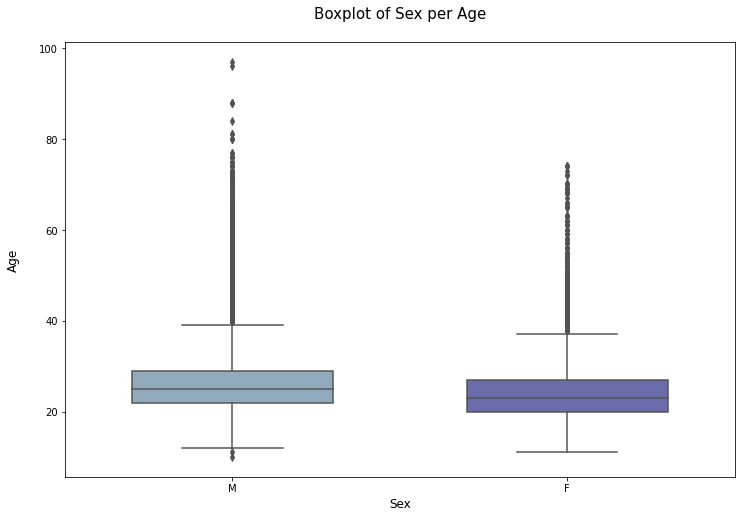

In [5]:
customBoxplot(physiological_cols[0])

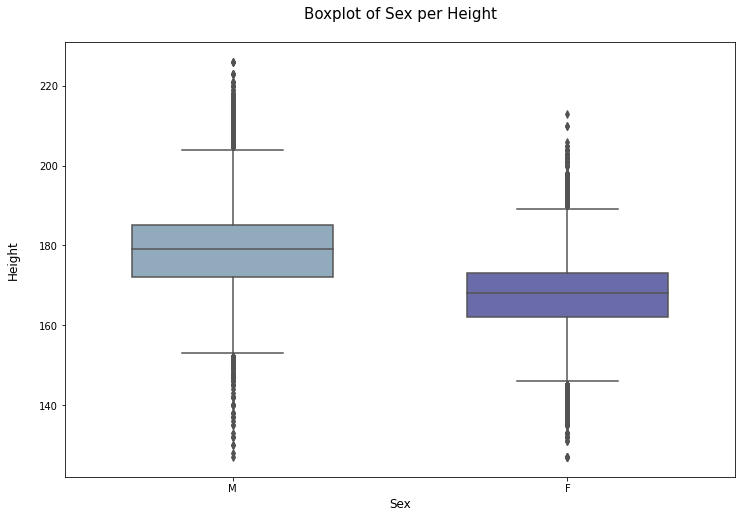

In [6]:
customBoxplot(physiological_cols[1])

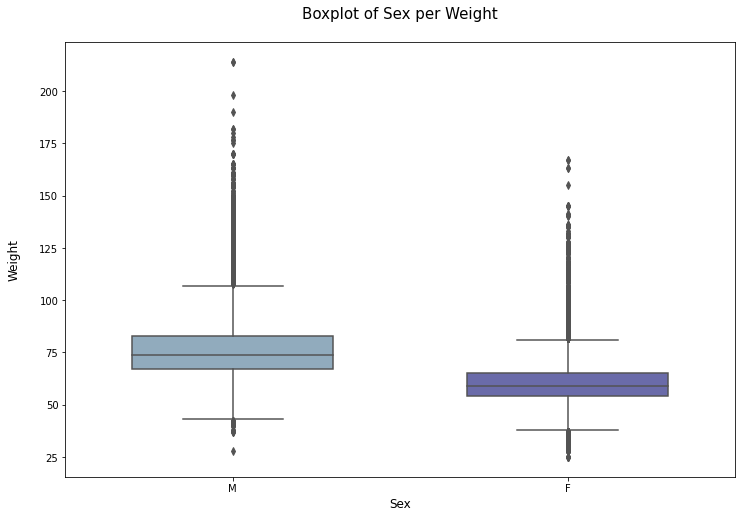

In [7]:
customBoxplot(physiological_cols[2])

## Activity 2

### Barplot: Top 10 countries with more gold medals

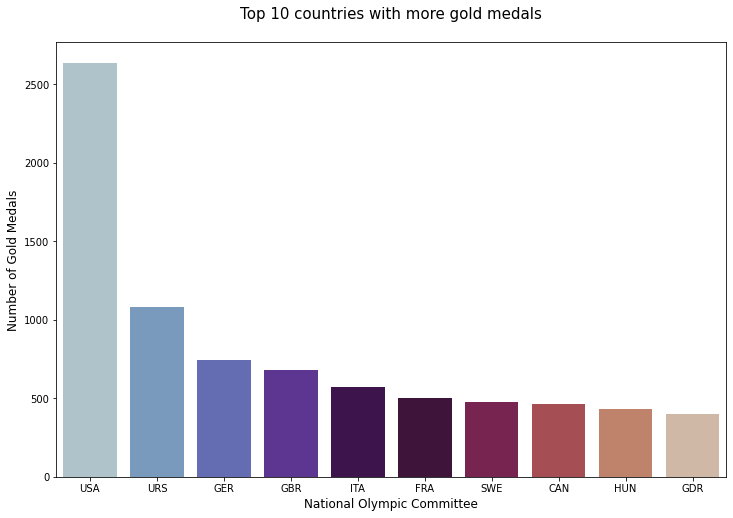

In [9]:
# Tacking just the gold medalists and turn "Gold" into 1 (for counting)
gold = df.query("Medal == 'Gold'").replace("Gold", 1)
# Tacking the top 10 countries
top10_gold = gold.groupby("NOC")["Medal"].sum().sort_values(ascending=False).head(10) 


plt.figure(figsize=(12,8))
sns.barplot(x=top10_gold.index, y=top10_gold.values, saturation=0.90, palette="twilight")
plt.xlabel("National Olympic Committee", fontsize=12)
plt.ylabel("Number of Gold Medals", fontsize=12)
plt.title("Top 10 countries with more gold medals\n", fontsize=15)
plt.show()

### Histogram of Height and Weight

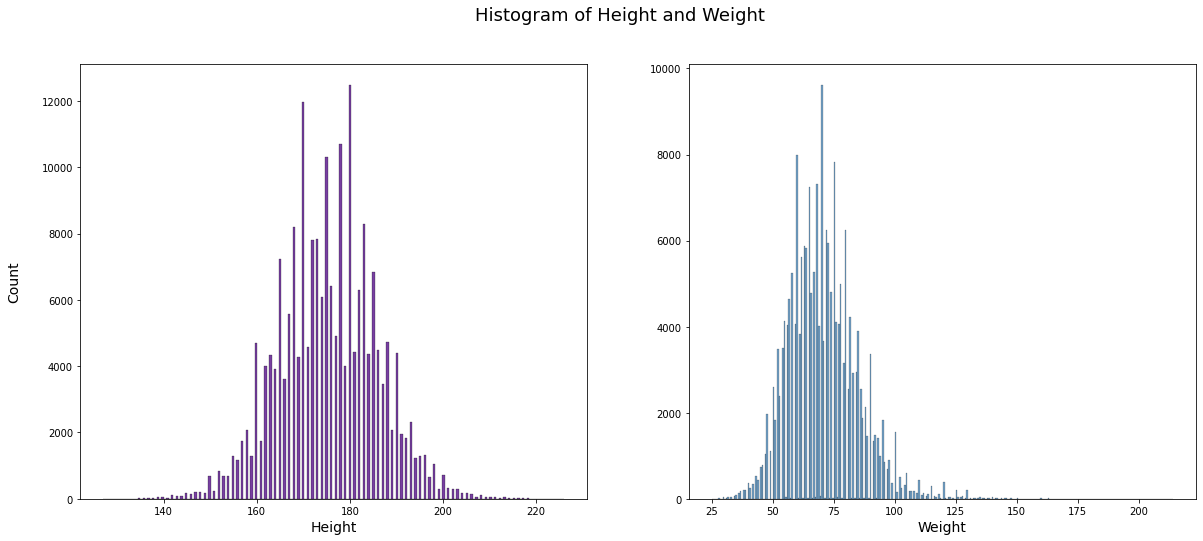

In [10]:
plt.figure(figsize=(20,8))
plt.suptitle("Histogram of Height and Weight", fontsize=18)

plt.subplot(1,2,1)
sns.histplot(data=df, x="Height", color="indigo")
plt.xlabel("Height", fontsize=14)
plt.ylabel("Count\n", fontsize=14)

plt.subplot(1,2,2)
sns.histplot(data=df, x="Weight", color="steelblue")
plt.xlabel("Weight", fontsize=14)
plt.ylabel("")

plt.show()

### Lineplot: Brazil performance in the Summer Olympics

In [36]:
# Tacking just the Brazilian performance
br = df.query("NOC == 'BRA' & Season == 'Summer'")
# Binary: Medal = 1 | No Medal = 0
br["BinMedal"] = (br["Medal"].isna() == False)
# Grouping for year
brMedals = br.groupby("Year")["BinMedal"].sum()

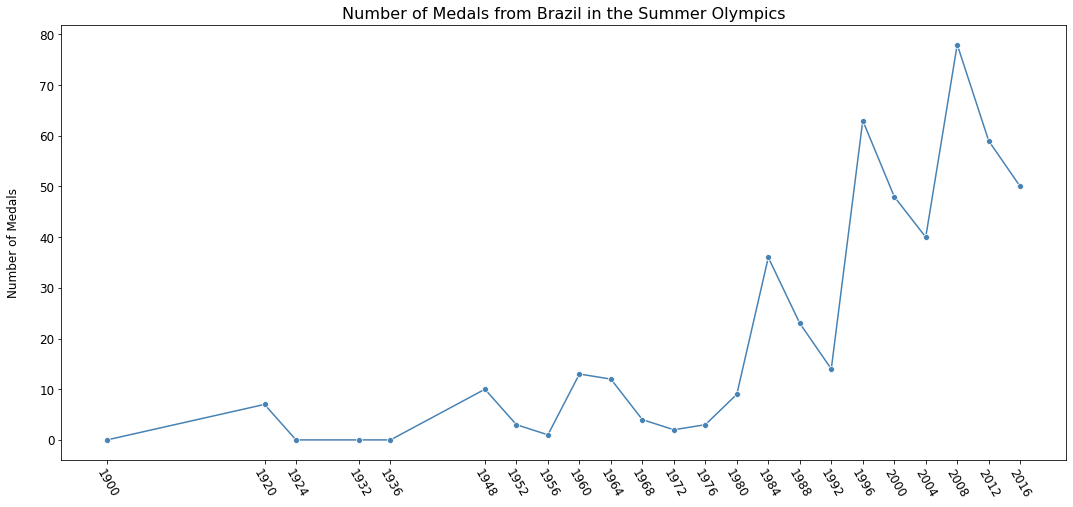

In [51]:
plt.figure(figsize=(18,8))
sns.lineplot(x=brMedals.index, y=brMedals.values, marker="o", color="steelblue")
plt.xticks(brMedals.index, rotation=300, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("Number of Medals\n", fontsize=12)
plt.title("Number of Medals from Brazil in the Summer Olympics", fontsize=16)
plt.show()

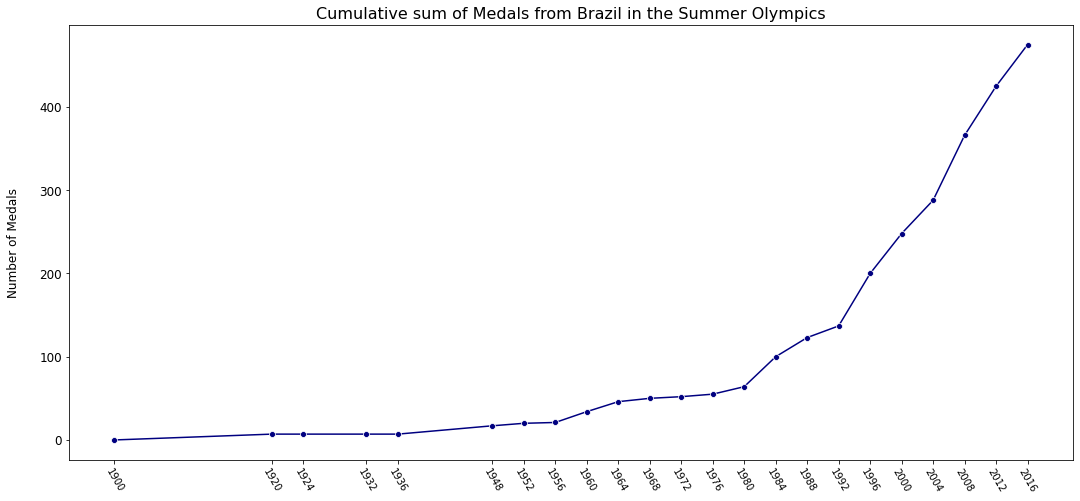

In [52]:
plt.figure(figsize=(18,8))
sns.lineplot(x=brMedals.cumsum().index, y=brMedals.cumsum().values, marker="o", color="navy")
plt.xticks(brMedals.index, rotation=300)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("Number of Medals\n", fontsize=12)
plt.title("Cumulative sum of Medals from Brazil in the Summer Olympics", fontsize=16)
plt.show()